In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from pathlib import Path

# 🔁 Update these with your actual file paths
red_path = Path(r"C:\Users\benmi\OneDrive\Desktop\Land Data\LC08_L2SP_226078_20240815_20240822_02_T1_SR_B4.TIF")  # RED
nir_path = Path(r"C:\Users\benmi\OneDrive\Desktop\Land Data\LC08_L2SP_226078_20240815_20240822_02_T1_SR_B5.TIF")  # NIR



In [3]:
# Load raster bands
with rasterio.open(nir_path) as nir_src, rasterio.open(red_path) as red_src:
    nir = nir_src.read(1).astype('float32')
    red = red_src.read(1).astype('float32')
    profile = nir_src.profile  # Keep geospatial metadata

# Compute NDVI
ndvi = (nir - red) / (nir + red)
ndvi = np.where((nir + red) == 0, np.nan, ndvi)  # Avoid divide-by-zero

# Show NDVI array basic stats
print(f"NDVI shape: {ndvi.shape}")
print(f"Min: {np.nanmin(ndvi):.2f}, Max: {np.nanmax(ndvi):.2f}, Mean: {np.nanmean(ndvi):.2f}")

C:\Users\benmi\AppData\Local\Temp\ipykernel_21140\3320316376.py:8: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


NDVI shape: (7741, 7651)
Min: -0.37, Max: 0.54, Mean: 0.24


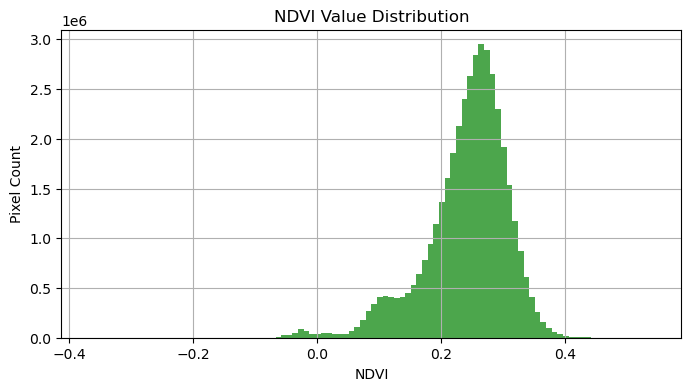

In [4]:
plt.figure(figsize=(8, 4))
plt.hist(ndvi.flatten(), bins=100, color='green', alpha=0.7)
plt.title("NDVI Value Distribution")
plt.xlabel("NDVI")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.show()

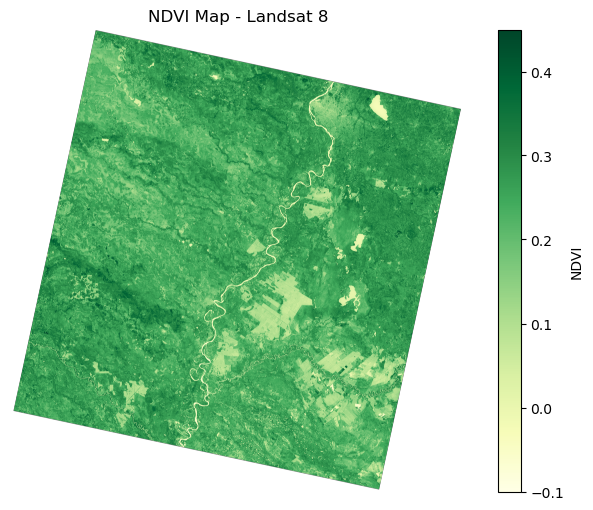

In [5]:
# Plot NDVI
plt.figure(figsize=(8, 6))
ndvi_plot = plt.imshow(ndvi, cmap='YlGn', vmin=-.1, vmax=0.45)
plt.colorbar(ndvi_plot, label="NDVI")
plt.title("NDVI Map - Landsat 8")
plt.axis('off')
plt.show()

In [8]:
# Save NDVI to GeoTIFF
ndvi_out = Path(r"C:\Users\benmi\OneDrive\Desktop\Land Data\ndvi_output.tif")
profile.update(dtype=rasterio.float32, count=1)

with rasterio.open(ndvi_out, 'w', **profile) as dst:
    dst.write(ndvi.astype('float32'), 1)

print(f"NDVI GeoTIFF saved to: {ndvi_out.resolve()}")

NDVI GeoTIFF saved to: C:\Users\benmi\OneDrive\Desktop\Land Data\ndvi_output.tif


In [23]:
# view datavalues of sample of .tif image
with rasterio.open(ndvi_out) as src:
    ndvi_data = src.read(1)
    print(ndvi_data[2000:2010, 3000:3010])  # print a 10x10 pixel block

[[0.24894416 0.25804713 0.2524242  0.26000845 0.26535296 0.26532942
  0.26167414 0.2552602  0.24776861 0.2527589 ]
 [0.2552001  0.26410207 0.2723414  0.2538245  0.25058964 0.26907173
  0.2711599  0.24172388 0.24564064 0.25583336]
 [0.2562724  0.26500118 0.26388246 0.25833842 0.25521094 0.2664046
  0.2698626  0.23766579 0.24618241 0.24745269]
 [0.24929732 0.26122418 0.24944189 0.2567885  0.25120774 0.2547993
  0.25082546 0.25130695 0.23756738 0.23528963]
 [0.2567955  0.25109893 0.24922815 0.25313342 0.25233072 0.251006
  0.24319611 0.2308101  0.23038992 0.23415148]
 [0.26870558 0.26326948 0.2541118  0.25107527 0.24411708 0.23949176
  0.22910845 0.22467889 0.23273754 0.23172289]
 [0.26358747 0.265244   0.26167834 0.25307068 0.24828584 0.23739134
  0.22750029 0.22478755 0.22140823 0.22634242]
 [0.2591657  0.25594965 0.25175968 0.24383728 0.23525822 0.23662898
  0.23219058 0.21892868 0.21677531 0.22258784]
 [0.2608862  0.2690748  0.25081134 0.24494244 0.24001533 0.2289691
  0.22059715 0.21